In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
fl_inflow_origin = pd.read_excel("2122fl.xlsx", sheet_name="County Inflow", usecols="C:F", skiprows=5)
fl_inflow_origin.columns = ["state_code", "county_code", "state", "county_name"]

fl_inflow_counts = pd.read_excel("2122fl.xlsx", sheet_name="County Inflow", usecols="G:I", skiprows=5)
fl_inflow_counts.columns = ["number_of_returns", "number_of_individuals", "AGI"]

In [3]:
fl_inflow = pd.concat([fl_inflow_origin, fl_inflow_counts], axis=1)
fl_inflow.dropna(inplace= True)

In [4]:
fl_inflow

,state_code,county_code,state,county_name,number_of_returns,number_of_individuals,AGI
0,97.0,0.0,FL,Alachua County Total Migration-US,9071,14706,617922
1,97.0,1.0,FL,Alachua County Total Migration-Same State,5209,8328,291691
2,97.0,3.0,FL,Alachua County Total Migration-Different State,3862,6378,326230
3,98.0,0.0,FL,Alachua County Total Migration-Foreign,29,69,1645
4,12.0,1.0,FL,Alachua County Non-migrants,91857,171600,7839527
...,...,...,...,...,...,...,...
6269,59.0,1.0,DS,Other flows - Northeast,23,39,1411
6270,59.0,3.0,DS,Other flows - Midwest,38,71,1746
6271,59.0,5.0,DS,Other flows - South,168,354,7725
6272,59.0,7.0,DS,Other flows - West,42,86,2593


In [5]:
total_us = fl_inflow[fl_inflow["county_name"].str.endswith("Total Migration-US")]

non = fl_inflow[fl_inflow["county_name"].str.contains("Non-migrants", case=False, na=False)]

total_us["county_name"] = total_us["county_name"].str.extract(r"^(.+?) County")[0]
non["county_name"] = non["county_name"].str.extract(r"^(.+?) County")[0]

total_us = total_us[["county_name", "number_of_individuals"]].rename(columns={"number_of_individuals": "total_migration"})
non = non[["county_name", "county_code", "number_of_individuals"]].rename(columns={"number_of_individuals": "non_migrants"})

final_df = pd.merge(non, total_us, on="county_name", how="inner")

final_df = final_df[["county_name", "county_code", "total_migration", "non_migrants"]]

C:\Users\dhair\AppData\Local\Temp\ipykernel_15460\4216251782.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_us["county_name"] = total_us["county_name"].str.extract(r"^(.+?) County")[0]
C:\Users\dhair\AppData\Local\Temp\ipykernel_15460\4216251782.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non["county_name"] = non["county_name"].str.extract(r"^(.+?) County")[0]


In [6]:
final_df.head(10)

,county_name,county_code,total_migration,non_migrants
0,Alachua,1.0,14706,171600
1,Baker,3.0,1530,20446
2,Bay,5.0,13183,128940
3,Bradford,7.0,1748,17315
4,Brevard,9.0,37471,465504
5,Broward,11.0,87547,1427769
6,Calhoun,13.0,686,8294
7,Charlotte,15.0,18754,134872
8,Citrus,17.0,12699,109622
9,Clay,19.0,20227,172143


In [7]:
## MENTAL HEALTH

In [8]:
cdc_data_22 = pd.read_csv('500_cities_data_22.csv')
fl_df = cdc_data_22[cdc_data_22["StateDesc"].str.contains("Florida", case=False, na=False)].copy()

In [9]:
# do mean and not median

In [10]:
mental_health_median = fl_df.groupby("CountyName")["MHLTH_CrudePrev"].median().reset_index()
mental_health_median.rename(columns={"MHLTH_CrudePrev": "mental_health_median"}, inplace=True)

print(mental_health_median.head())

  CountyName  mental_health_median
0    Alachua                 18.25
1      Baker                 19.10
2        Bay                 17.80
3   Bradford                 19.45
4    Brevard                 15.80


In [11]:
merged_df = pd.merge(final_df, mental_health_median, left_on="county_name", right_on="CountyName", how="inner")

merged_df.drop(columns=["CountyName"], inplace=True)

print(merged_df.head())

  county_name  county_code total_migration non_migrants  mental_health_median
0     Alachua          1.0           14706       171600                 18.25
1       Baker          3.0            1530        20446                 19.10
2         Bay          5.0           13183       128940                 17.80
3    Bradford          7.0            1748        17315                 19.45
4     Brevard          9.0           37471       465504                 15.80


In [12]:
##

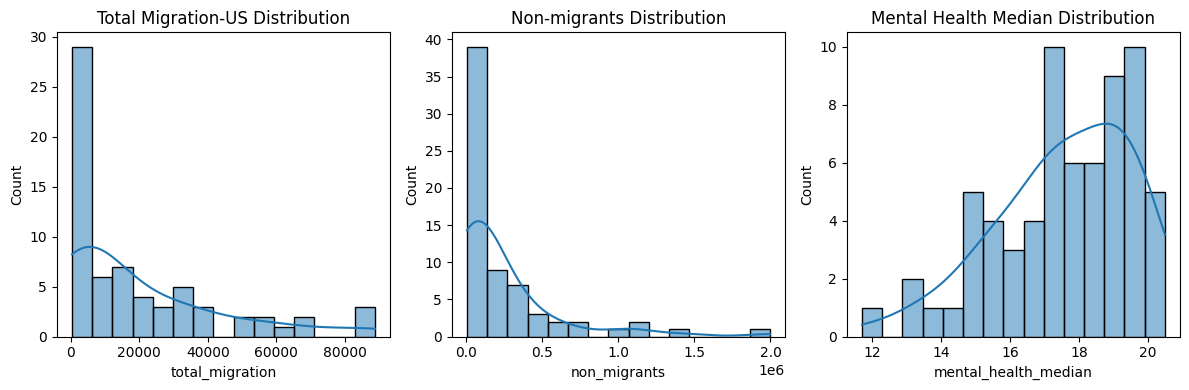

In [13]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.histplot(merged_df["total_migration"], bins=15, kde=True)
plt.title("Total Migration-US Distribution")

plt.subplot(1,3,2)
sns.histplot(merged_df["non_migrants"], bins=15, kde=True)
plt.title("Non-migrants Distribution")

plt.subplot(1,3,3)
sns.histplot(merged_df["mental_health_median"], bins=15, kde=True)
plt.title("Mental Health Median Distribution")

plt.tight_layout()
plt.show()


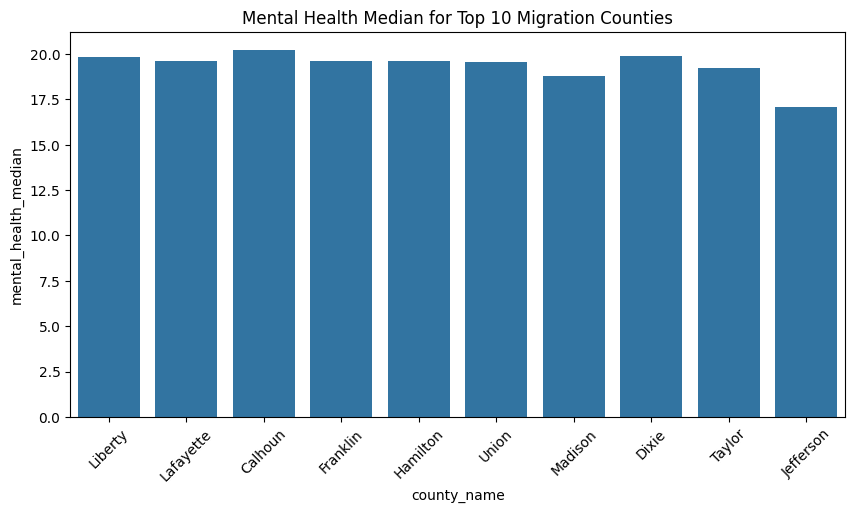

In [14]:
top_migration = merged_df.sort_values("total_migration", ascending=True).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x="county_name", y="mental_health_median", data=top_migration)
plt.xticks(rotation=45)
plt.title("Mental Health Median for Top 10 Migration Counties")
plt.show()


In [ ]:
# see which counties have lowwest migration and see their mental health . 
# see mental health before lots of inflow came. can start with line plot for each county seperately .
# 

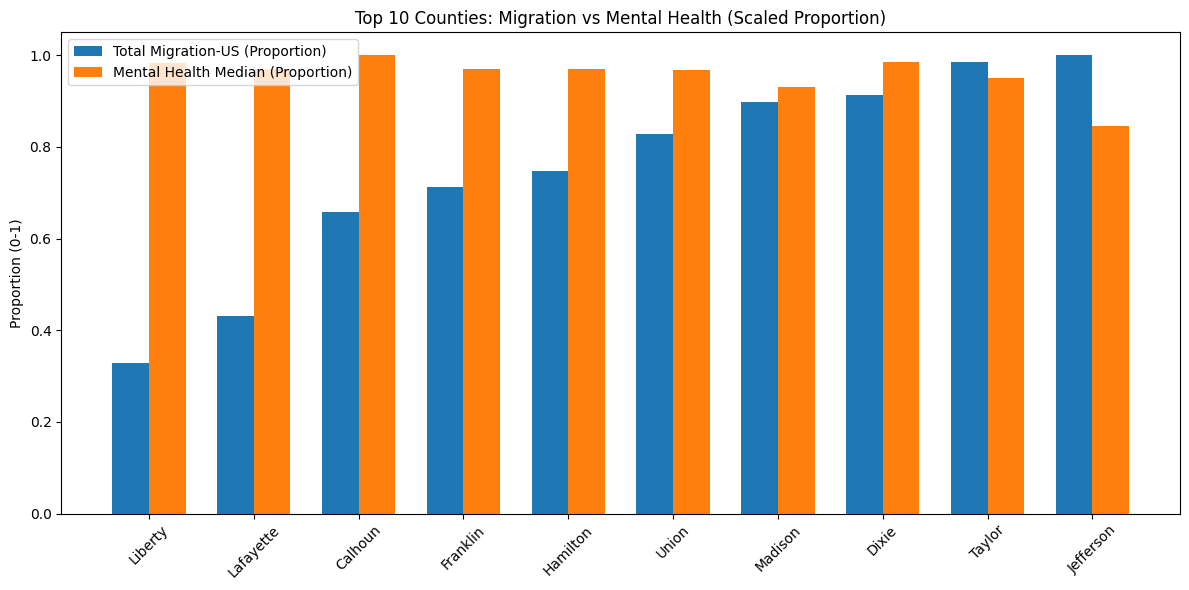

In [ ]:
import matplotlib.pyplot as plt

# Get top 10 counties by total migration
top10 = merged_df.sort_values("total_migration", ascending=True).head(10).copy()

# Normalize both columns to 0-1 range
top10["total_migration_prop"] = top10["total_migration"] / top10["total_migration"].max()
top10["mental_health_prop"] = top10["mental_health_median"] / top10["mental_health_median"].max()

x = np.arange(len(top10))
width = 0.35

plt.figure(figsize=(12,6))

plt.bar(x - width/2, top10["total_migration_prop"], width, label="Total Migration-US (Proportion)")
plt.bar(x + width/2, top10["mental_health_prop"], width, label="Mental Health Median (Proportion)")

plt.xticks(x, top10["county_name"], rotation=45)
plt.ylabel("Proportion (0-1)")
plt.title("Top 10 Counties: Migration vs Mental Health (Scaled Proportion)")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# see few years back ,see which county has explosive migration. and see their mental health before the migration and after the migration.

# focus is the one which didnt have most inflow, but where the inflow increased most. the county having highest increase in inflow.